# Musk DataSet

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import h5py

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [6]:
#Check for  Null Values
data.isna().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [7]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


## Preprocessing

In [8]:
data.drop('molecule_name',axis = 1,inplace = True)

In [9]:
data.drop('ID', axis = 1, inplace = True)

In [10]:
data.head()

,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,...,-308,52,-7,39,126,156,-50,-112,96,1
1,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,...,-59,-2,52,103,136,169,-61,-136,79,1
2,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,...,-134,-154,57,143,142,165,-67,-145,39,1
3,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,136,168,-60,-135,80,1
4,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,137,168,-60,-135,80,1


In [11]:
"""  Splitting the conformation_name model into 3 parts
     1. Molecule Name
     2. ISO -- Sterioisomer Number
     3. CONF -- Conformation Number """

data['MOL'] = np.nan
data['ISO'] = np.nan
data['CONF'] = np.nan

for i in range(len(data['conformation_name'])):
    x = data['conformation_name'][i].replace('+','_').split('_')
    data['MOL'][i] = x[0]
    data['ISO'][i] = x[1]
    data['CONF'][i] = x[2]


In [12]:
data.head()

,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f161,f162,f163,f164,f165,f166,class,MOL,ISO,CONF
0,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,...,39,126,156,-50,-112,96,1,211,1.0,1.0
1,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,...,103,136,169,-61,-136,79,1,211,1.0,10.0
2,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,...,143,142,165,-67,-145,39,1,211,1.0,11.0
3,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,...,104,136,168,-60,-135,80,1,211,1.0,12.0
4,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,...,104,137,168,-60,-135,80,1,211,1.0,13.0


In [13]:
# Deleting Unwanted Columns
data.drop('conformation_name', axis = 1, inplace = True)
data.drop('MOL', axis = 1, inplace = True)

In [14]:
# Shuffling the Dataset to generate randomness
df = shuffle(data).reset_index(drop = True)
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f160,f161,f162,f163,f164,f165,f166,class,ISO,CONF
0,43,-141,-12,149,-117,133,90,18,-30,-59,...,-43,149,117,212,-73,-199,-5,0,4.0,178.0
1,46,-172,-132,153,-117,-27,190,234,18,-174,...,-15,153,125,202,-73,-188,3,0,2.0,162.0
2,44,-103,-19,-74,-117,71,-167,39,-193,-21,...,-9,150,130,160,-66,-145,-6,0,4.0,28.0
3,43,-175,-36,115,-117,63,-169,70,-213,15,...,-21,134,110,177,-68,-163,-18,0,3.0,174.0
4,69,-142,-62,137,-117,133,-154,-5,-216,-108,...,41,85,35,287,-68,-270,67,0,1.0,9.0


In [15]:
# Separating Input & Output
X = df.drop('class', axis = 1)
Y = df['class']

# Converting dataframe object to numpy array

X = X.to_numpy()
Y = Y.to_numpy()

In [16]:
print(X.shape)
print(Y.shape)

(6598, 168)
(6598,)


### Feature Scaling

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Principal Component Analysis

In [18]:
# Finding the optimal number of features after maintaining 95% variance
pca = PCA()
pca.fit(X_scaled)

current_variance= 0
total = sum(pca.explained_variance_)
optimal_components = 0
while current_variance/total < 0.95:
    current_variance+=pca.explained_variance_[optimal_components]
    optimal_components+=1
    
optimal_components     

40

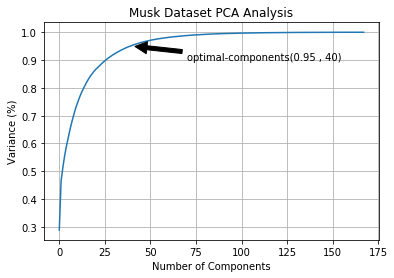

<Figure size 432x288 with 0 Axes>

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Musk Dataset PCA Analysis')

plt.annotate('optimal-components(0.95 , 40)', xy=(40, 0.95), xytext=(70, 0.9),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.grid()

### Train-Test Split

In [20]:
#Splitting the Dataset for Training & Testing
#80-20 Split Ratio is maintained

x_train, x_test, y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.20,random_state = 0)

In [21]:
pca1 = PCA(n_components=optimal_components)
x_train_pca = pca1.fit_transform(x_train)
x_test_pca = pca1.transform(x_test)

## Multi Layer Perceptron

In [22]:
model = Sequential()

In [23]:
# Hidden Layer 1
model.add(Dense(20, activation = 'relu',
                kernel_initializer = 'random_normal', input_dim = 40))
# Hidden Layer 2
model.add(Dense(20, activation = 'relu',
               kernel_initializer = 'random_normal'))
# Output Layer
model.add(Dense(2, activation = 'sigmoid',
               kernel_initializer = 'random_normal'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                820       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Compiling Model
model.compile(loss = 'binary_crossentropy',optimer = 'adam', metrics = ['accuracy'])

In [25]:
tensorBoard = TensorBoard(log_dir = 'logs/{}'.format(time()))

In [26]:
history = model.fit(x_train_pca,to_categorical(y_train, num_classes = 2), epochs= 10 , batch_size = 20,
          validation_data = (x_test_pca,to_categorical(y_test, num_classes = 2)),
         callbacks = [tensorBoard])
model.metrics_names

Train on 5278 samples, validate on 1320 samples
Epoch 1/10
5278/5278 [==============================] - 1s 190us/sample - loss: 0.3521 - accuracy: 0.8449 - val_loss: 0.2258 - val_accuracy: 0.8920
Epoch 2/10
5278/5278 [==============================] - 0s 68us/sample - loss: 0.1788 - accuracy: 0.9334 - val_loss: 0.1558 - val_accuracy: 0.9462
Epoch 3/10
5278/5278 [==============================] - 0s 65us/sample - loss: 0.1201 - accuracy: 0.9638 - val_loss: 0.1100 - val_accuracy: 0.9583
Epoch 4/10
5278/5278 [==============================] - 0s 65us/sample - loss: 0.0859 - accuracy: 0.9703 - val_loss: 0.0847 - val_accuracy: 0.9689
Epoch 5/10
5278/5278 [==============================] - 0s 66us/sample - loss: 0.0641 - accuracy: 0.9769 - val_loss: 0.0696 - val_accuracy: 0.9735
Epoch 6/10
5278/5278 [==============================] - 0s 78us/sample - loss: 0.0511 - accuracy: 0.9811 - val_loss: 0.0587 - val_accuracy: 0.9811
Epoch 7/10
5278/5278 [==============================] - 0s 89us/sampl

['loss', 'accuracy']

In [32]:
# model.save('model-updated.h5')

### Graphical Representation

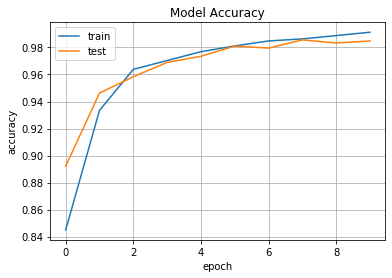

In [33]:
# Model Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.grid()
# plt.savefig('Model-Accuracy-Updated.png')

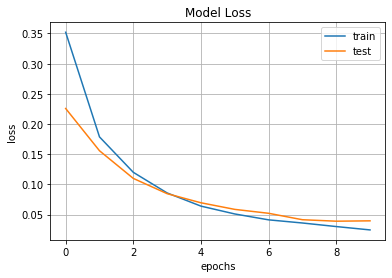

In [34]:
# Model Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('Model Loss')
plt.legend(['train','test'])
plt.grid()
# plt.savefig('Model-Loss-Updated.png')

### Classification Report

In [30]:
y_predicted = model.predict(x_test_pca, batch_size = 20)
y_pred_bool = np.argmax(y_predicted, axis=1)

In [31]:
print(classification_report(y_test,y_pred_bool))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1114
           1       0.96      0.95      0.95       206

    accuracy                           0.98      1320
   macro avg       0.97      0.97      0.97      1320
weighted avg       0.98      0.98      0.98      1320

